simple MNIST NN from scratch¶
In this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.


In [53]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

In [7]:
data=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [8]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev = X_dev / 255

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [55]:
def init_pram():
    w1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1) -0.5
    w2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return w1,b1,w2,b2

def relu(z):
    return np.maximum(z, 0)

def softmax(z):
    a=np.exp(z) / sum(np.exp(z))
    return a

def forward(w1,b1,w2,b2,x):
    z1=w1.dot(x)+b1
    a1=relu(z1)
    z2=w2.dot(a1)+b2
    a2=softmax(z2)
    return z1,a1,z2,a2

def one_hot(y):
    one_hot_y=np.zeros((y.size,y.max()+1))
    one_hot_y[np.arange(y.size),y]=1
    one_hot_y=one_hot_y.T
    return  one_hot_y

def ReLU_deriv(Z):
    return Z > 0

def back_prop(z1,a1,z2,a2,w1,w2,x,y):
    one_hot_y=one_hot(y)
    dz2=a2-one_hot_y
    dw2=1/m*dz2.dot(a1.T)
    db2=1/m *np.sum(dz2)
    dz1=w2.T.dot(dz2)* ReLU_deriv(z1)
    dw1=1/m* dz1.dot(x.T)
    db1=1/m*np.sum(dz1)
    return dw1,db1,dw2,db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [56]:
def get_pred(a2):
    return np.argmax(a2,0)

def get_acc(predic,y):
    print(predic,y)
    return np.sum(predic==y)/y.size


def gradient_descent(x,y,itera,alpha):
    w1,b1,w2,b2=init_pram()
    for i in range (itera):
        z1,a1,z2,a2=forward(w1,b1,w2,b2,x)
        dw1,db1,dw2,db2=back_prop(z1,a1,z2,a2,w1,w2,x,y)
        w1,b1,w2,b2=update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i % 10 ==0 :
            print("iteration:",i)
            predictions =get_pred(a2)
            print("Accuracy:",get_acc(predictions,y))
    return w1,b1,w2,b2

In [57]:
w1,b1,w2,b2=gradient_descent(X_train, Y_train,500, 0.10)

iteration: 0
[2 2 2 ... 2 2 2] [0 9 8 ... 3 1 8]
Accuracy: 0.10421951219512195
iteration: 10
[0 4 0 ... 8 0 2] [0 9 8 ... 3 1 8]
Accuracy: 0.2401219512195122
iteration: 20
[0 4 8 ... 8 1 8] [0 9 8 ... 3 1 8]
Accuracy: 0.3420975609756098
iteration: 30
[0 4 8 ... 8 1 8] [0 9 8 ... 3 1 8]
Accuracy: 0.4033658536585366
iteration: 40
[0 4 8 ... 8 1 8] [0 9 8 ... 3 1 8]
Accuracy: 0.4478536585365854
iteration: 50
[0 4 8 ... 8 1 8] [0 9 8 ... 3 1 8]
Accuracy: 0.4832439024390244
iteration: 60
[0 4 8 ... 3 1 8] [0 9 8 ... 3 1 8]
Accuracy: 0.5134390243902439
iteration: 70
[0 4 8 ... 3 1 8] [0 9 8 ... 3 1 8]
Accuracy: 0.5400243902439025
iteration: 80
[0 4 8 ... 3 1 8] [0 9 8 ... 3 1 8]
Accuracy: 0.5748536585365853
iteration: 90
[0 4 8 ... 3 1 8] [0 9 8 ... 3 1 8]
Accuracy: 0.605609756097561
iteration: 100
[0 4 8 ... 3 1 8] [0 9 8 ... 3 1 8]
Accuracy: 0.6296585365853659
iteration: 110
[0 4 8 ... 3 1 8] [0 9 8 ... 3 1 8]
Accuracy: 0.649
iteration: 120
[0 4 8 ... 3 1 8] [0 9 8 ... 3 1 8]
Accuracy: 0.6

In [61]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward(W1, b1, W2, b2, X)
    predictions = get_pred(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


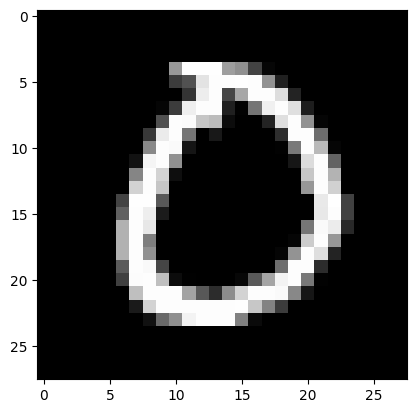

Prediction:  [9]
Label:  9


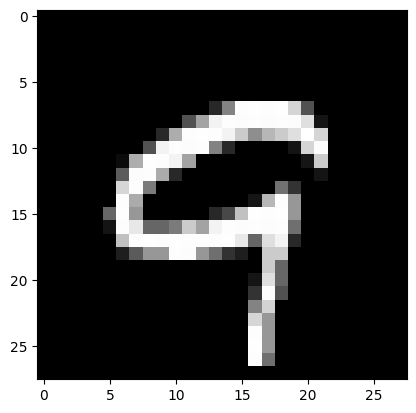

Prediction:  [8]
Label:  8


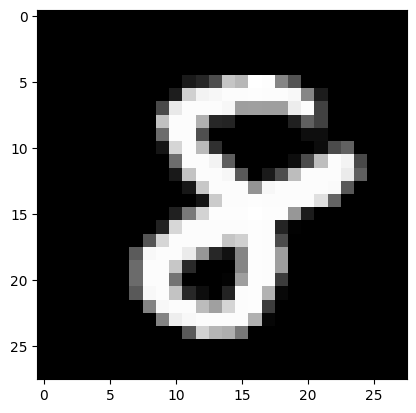

Prediction:  [8]
Label:  8


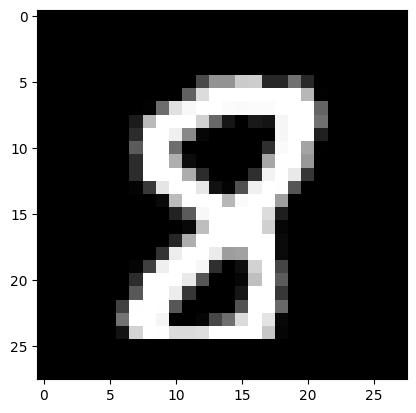

In [62]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)

In [65]:
dev_predictions = make_predictions(X_dev, w1, b1, w2, b2)
get_acc(dev_predictions, Y_dev)

[0 8 6 6 8 7 8 3 9 8 9 1 3 4 8 5 5 7 8 4 2 9 0 6 5 8 8 3 2 6 6 2 8 8 0 1 9
 5 9 6 7 8 2 6 9 7 4 8 9 0 4 8 1 2 7 1 4 1 4 3 5 6 6 1 8 0 3 6 6 3 2 7 9 9
 0 9 7 1 6 5 5 7 2 5 9 1 9 4 2 8 3 2 4 8 9 7 5 3 8 9 1 6 7 9 7 4 5 8 6 4 0
 6 0 0 5 1 4 1 4 4 6 8 6 5 5 5 0 7 8 4 3 4 8 0 9 7 4 1 9 2 4 4 2 8 7 8 2 2
 1 1 4 6 1 7 4 7 4 6 3 7 8 2 1 1 1 1 4 3 8 2 0 7 4 0 1 7 0 9 0 6 3 3 3 6 9
 3 6 6 0 1 6 7 2 5 7 1 0 9 2 7 2 2 3 0 2 9 2 0 5 9 4 9 5 9 6 2 0 8 9 4 5 2
 1 0 3 4 6 9 5 0 5 3 1 7 7 3 6 5 1 5 0 6 5 7 1 5 2 7 8 7 9 2 0 0 3 1 6 5 0
 9 7 3 8 3 1 6 6 4 3 2 1 6 8 9 1 9 1 2 0 6 3 0 2 0 4 5 2 4 8 7 4 1 2 2 4 8
 1 9 7 5 0 0 8 4 5 0 9 1 7 0 0 4 1 9 7 3 5 1 8 8 3 4 6 1 4 0 8 1 3 7 8 3 4
 1 7 4 7 7 8 1 8 0 0 6 0 4 3 3 8 4 7 6 6 9 2 3 3 2 5 2 9 1 4 4 8 0 3 4 7 5
 4 7 8 9 5 6 4 4 7 9 8 0 4 1 3 2 7 6 7 3 3 0 9 9 8 4 0 4 7 3 4 4 3 2 3 8 5
 1 3 8 7 0 6 4 3 1 8 1 4 5 3 8 5 3 6 6 6 5 1 4 1 7 5 3 8 0 1 0 7 0 0 7 2 4
 2 8 2 1 7 5 3 3 3 8 6 6 7 3 9 3 6 1 3 5 7 6 9 8 1 7 6 4 0 2 0 6 0 3 1 3 6
 2 9 8 3 0 0 7 6 0 5 3 9 

0.86

Still 86% accuracy, so our model generalized from the training data pretty well.